In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from mo_notebook_fns import *

In [2]:
# If you want to store the Morris output
file_name = "Morris_NashIso.json"

## How was the problem posed?

In [3]:
names = ['z3_factor',
         'cZ0Z1', 'cZ',
         'c_adr',
         'k_g',
         'gamma01', 'gammaZ',
         'f_transp',
         'FCz2', 'FCZ',
         'SATz2', 'SATZ',
         'WPz2', 'WPZ',
         'W100_30mm', 'W100_1550mm', 'W100_1555mm',
         'f_oc', 'k_oc',
         'beta_runoff',
         'dt_50_aged',
         'dt_50_ab',
         'dt_50_ref',
         'epsilon_iso',
         'beta_moisture']

bounds = [[0.75, 0.99],  # z3_factor
          [0.01, 1.0], [0.01, 1.0],  # c_lf
          [0.001, 1.0],  # cadr
          [1100.0, 3650.0],  # k_g
          [0.0001, 1.0], [0, 1.0],  # gamma
          [0.0001, 1.0],  # f_transp
          [0.34, 0.41], [0.34, 0.41],  # FC
          [0.44, 0.61], [0.47, 0.53],  # SAT
          [0.13, 0.24], [0.13, 0.24],  # WP
          [0.39, 0.42], [0.34, 0.43], [0.35, 0.41],  # W100
          [0.01, 0.05], [110.0, 369.0],  # f_oc, k_oc
          [0.01, 1.0],  # beta_runoff
          [140.0, 7000.0],  # age_rate
          [130.0, 230.0],  # dt_50_ab
          [26.0, 37.0],  # dt_50_ref
          [1.0, 3.0],  # epsilon (in absolute, convert to negative!!)
          [0.01, 1.0]]  # beta_moisture


problem = {
        'num_vars': len(names),
        'names': names,
        'bounds': bounds
    }

params_test = np.loadtxt('input_vectors.txt', float)

p = 4.0
grid_jump = 2
r = 4
runs = 104

## Output vars?

In [4]:
def get_tss(folder, name):
    path = str(folder) + "/" + name + ".tss"
    res = np.loadtxt(path, float, skiprows=4, usecols=[1])
    return res

# get_tss(1, "resNash_q_m3")

In [5]:
nash = ["resNash_NcompConc_L",
        "resNash_NcompIso",
        "resNash_outConc_ugL",
        "resNash_outIso_delta",
        "resNash_q_m3", 
        "resNash_ScompConc_L", 
        "resNash_ScompIso", 
        "resNash_VcompConc_L", 
        "resNash_VcompIso"
        ]

nash_iso = ["resNash_q_m3", "resNash_outIso_delta",
            "resNash_NcompIso",
            "resNash_ScompIso", 
            "resNash_VcompIso"
            ]

In [6]:
morris_results = getSiList(
    nash_iso, 
    problem, 
    params_test, 
    grid_jump, p, runs, nash=True, console=False)

In [7]:
# saveMorris(nash_iso, morris_results, filename=file_name)

In [8]:
df = get_morris_df(nash_iso, morris_results)

In [9]:
df.head()

,mu_star,parameter,sigma,name
0,0.717218,z3_factor,1.000000,resNash_q_m3
1,0.109581,cZ0Z1,0.181458,resNash_q_m3
2,0.082750,cZ,0.170500,resNash_q_m3
3,0.022517,c_adr,0.047599,resNash_q_m3
4,0.450626,k_g,0.550387,resNash_q_m3


In [10]:
marker = ['o', 'x', '^', '+', '*', '1', '2', '3', '4', '8', 's', 'p', 
          'D', 'o', 'x', '^', '+', '*', '1', '2', '3', '4', '8', 's', '+', '*']

# markers = [marker[i] for i in range(len(df["parameter"].unique()))]

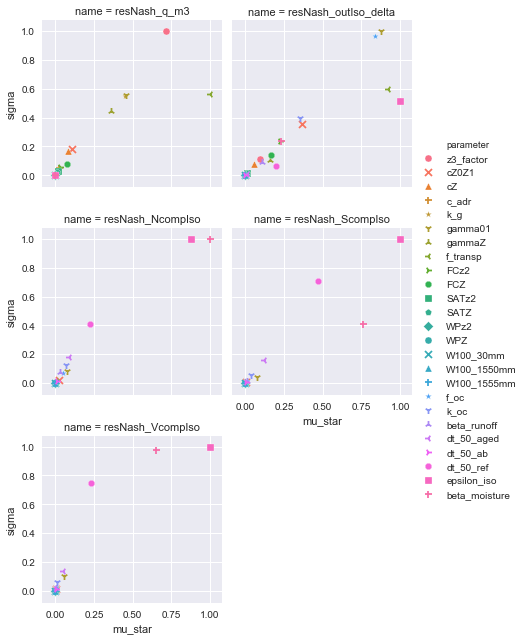

In [12]:
g = sns.FacetGrid(df, col="name", hue="parameter", 
                  hue_kws={"marker": marker}, col_wrap=2)
g = g.map(plt.scatter, "mu_star", "sigma", edgecolor="w").add_legend()

### Variables with least sensitivity

Here we show results for isotope signatures for outlet (top right) and composite transects. Discharge sensitivity (m3) is also shown (top left). 

I would **remove** from the hypercube sampling:

- Water content at -100cm (all layers, W100_XXmm, etc.) = 3 vars.
- Wilting point (all layers: WPz2, WPZ) = 2 vars.

Of the sensitive variables with **least effect**, but some nevertheless:

- Field capacities (all layers) = 2 vars
- Saturation capcities (all layers: SATz2, SATZ) = 2 vars.

I would **remove** thus at least Saturation cap. from the last two.

In [23]:
# df.loc[df.name == 'resNash_q_m3']